## Returning the Best Dataset Settings for our premade Experiments

---


In [3]:
import sys  
sys.path.insert(0, '../../')

We now just reload our three studys from the results folder and we can easily checkout the best values / parameters

In [5]:
import optuna
import pandas as pd

study_name_1 = 'two_moons'
two_moons_study = optuna.create_study(study_name=study_name_1, storage=f'sqlite:///../../results/optimization/{study_name_1}.db', load_if_exists=True, direction='maximize')
two_moons_results = pd.read_csv(f'../../results/optimization/{study_name_1}.csv') 

study_name_2 = 'den_blobs'
blobs_study = optuna.create_study(study_name=study_name_2, storage=f'sqlite:///../../results/optimization/{study_name_2}.db', load_if_exists=True, direction='maximize')
blobs_results = pd.read_csv(f'../../results/optimization/{study_name_2}.csv') 

study_name_3 = 'rings'
ring_study = optuna.create_study(study_name='rings', storage=f'sqlite:///../../results/optimization/{study_name_3}.db', load_if_exists=True, direction='maximize')
rings_results = pd.read_csv(f'../../results/optimization/{study_name_3}.csv') 

[I 2021-05-15 16:06:20,092] Using an existing study with name 'two_moons' instead of creating a new one.
[I 2021-05-15 16:06:20,130] Using an existing study with name 'den_blobs' instead of creating a new one.
[I 2021-05-15 16:06:20,167] Using an existing study with name 'rings' instead of creating a new one.


Now we can load our best value (Best AMI of Rock - Mean Best AMI of competing algorithms) und params, though in order to have more discrete parameter values (to reflect the idea of an actual researcher overoptimizing their algorithm) to create the dataset jitter is actually multiplied by 0.01 and n_samples by 1000



In [6]:
print(two_moons_study.best_value)
print(two_moons_study.best_params)
print(two_moons_study.best_trial)
moons_jitter = two_moons_study.best_params['jitter'] * 0.01
moons_samples = two_moons_study.best_params['n_samples'] * 100

0.3580777415846453
{'jitter': 15, 'n_samples': 10}
FrozenTrial(number=4, values=[0.3580777415846453], datetime_start=datetime.datetime(2021, 5, 15, 11, 5, 41, 562559), datetime_complete=datetime.datetime(2021, 5, 15, 11, 7, 10, 278216), params={'jitter': 15, 'n_samples': 10}, distributions={'jitter': IntUniformDistribution(high=20, low=1, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=5, state=TrialState.COMPLETE, value=None)


In [8]:
two_moons_results.iloc[10 * 4: 10 * 5]

,Unnamed: 0,run_id,step,n_samples,jitter,k,eps,min_pts,bandwidth,ROCK,K_MEANS,DBSCAN,SPECTRAL,MEAN_SHIFT
40,40,0,0,1000,0.15,2,0.2,4,1.249697,0.876718,0.390200,0.001767,0.447690,0.439425
41,41,0,1,1000,0.15,2,0.2,4,1.254384,0.658533,0.351070,-0.000979,0.398060,0.415874
42,42,0,2,1000,0.15,2,0.2,4,1.251109,0.477730,0.370152,-0.001268,0.438322,0.451415
43,43,0,3,1000,0.15,2,0.2,4,1.249379,0.912650,0.385572,0.004569,0.428786,0.434082
44,44,0,4,1000,0.15,2,0.2,4,1.250861,0.887986,0.358124,-0.000937,0.397452,0.418149
45,45,0,5,1000,0.15,2,0.2,4,1.241584,0.810535,0.382286,0.000418,0.434018,0.434018
46,46,0,6,1000,0.15,2,0.2,4,1.245107,0.908390,0.362989,-0.000055,0.397286,0.415472
47,47,0,7,1000,0.15,2,0.2,4,1.249491,0.577845,0.367659,-0.000979,0.412816,0.434467
48,48,0,8,1000,0.15,2,0.2,4,1.241564,0.864449,0.362846,0.005226,0.423290,0.431282
49,49,0,9,1000,0.15,2,0.2,4,1.254445,0.906393,0.372491,-0.001259,0.399841,0.417999


In [9]:
# jitter does not matter here since it is not used for the generation of blobs
print(blobs_study.best_value)
print(blobs_study.best_params)
print(blobs_study.best_trial)
blobs_features = blobs_study.best_params['n_features']
blobs_samples = blobs_study.best_params['n_samples'] * 100
blobs_centers = blobs_study.best_params['n_centers']

0.0741322181944486
{'n_centers': 2, 'n_features': 3, 'n_samples': 8}
FrozenTrial(number=87, values=[0.0741322181944486], datetime_start=datetime.datetime(2021, 5, 15, 12, 37, 40, 288348), datetime_complete=datetime.datetime(2021, 5, 15, 12, 38, 26, 234079), params={'n_centers': 2, 'n_features': 3, 'n_samples': 8}, distributions={'n_centers': IntUniformDistribution(high=10, low=2, step=1), 'n_features': IntUniformDistribution(high=20, low=2, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=88, state=TrialState.COMPLETE, value=None)


In [12]:
blobs_results.iloc[87 * 10 : 88 * 10]

,Unnamed: 0,run_id,step,n_samples,n_centers,n_features,k,eps,min_pts,bandwidth,ROCK,K_MEANS,DBSCAN,SPECTRAL,MEAN_SHIFT
870,870,0,0,800,2,3,2,0.2,6,1.683661,0.572850,0.431114,0.137840,0.418176,0.053725
871,871,0,1,800,2,3,2,0.2,6,1.622116,0.896204,0.694758,0.361597,0.760809,0.000000
872,872,0,2,800,2,3,2,0.2,6,1.602190,0.877417,0.731898,0.321625,0.720737,0.000000
873,873,0,3,800,2,3,2,0.2,6,1.605334,0.951425,0.834614,0.296952,0.855639,0.902775
874,874,0,4,800,2,3,2,0.2,6,1.398963,1.000000,0.908772,0.543191,0.943683,0.874567
875,875,0,5,800,2,3,2,0.2,6,1.046854,0.987380,0.977263,0.544102,0.987380,0.977263
876,876,0,6,800,2,3,2,0.2,6,1.381370,1.000000,0.883974,0.553612,0.968090,0.929061
877,877,0,7,800,2,3,2,0.2,6,1.533997,0.977263,0.752483,0.457183,0.805242,0.803575
878,878,0,8,800,2,3,2,0.2,6,0.912927,1.000000,1.000000,0.592233,1.000000,1.000000
879,879,0,9,800,2,3,2,0.2,6,1.524809,0.812059,0.756861,0.315186,0.777990,0.802284


In [13]:
print(ring_study.best_value)
print(ring_study.best_params)
print(ring_study.best_trial)
ring_jitter = ring_study.best_params['jitter'] * 0.01
ring_samples = ring_study.best_params['n_samples'] * 100

0.18529344707687065
{'factor': 8, 'jitter': 2, 'n_samples': 16}
FrozenTrial(number=23, values=[0.18529344707687065], datetime_start=datetime.datetime(2021, 5, 15, 11, 43, 45, 462327), datetime_complete=datetime.datetime(2021, 5, 15, 11, 44, 57, 559574), params={'factor': 8, 'jitter': 2, 'n_samples': 16}, distributions={'factor': IntUniformDistribution(high=9, low=1, step=1), 'jitter': IntUniformDistribution(high=20, low=1, step=1), 'n_samples': IntUniformDistribution(high=16, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=24, state=TrialState.COMPLETE, value=None)


In [16]:
rings_results.iloc[23 * 10 : 24 * 10]

,Unnamed: 0,run_id,step,n_samples,jitter,factor,k,eps,min_pts,bandwidth,ROCK,K_MEANS,DBSCAN,SPECTRAL,MEAN_SHIFT
230,230,0,0,1600,0.02,0.8,2,0.2,4,1.286035,0.191294,-0.000441,0.0,-0.000433,-0.000885
231,231,0,1,1600,0.02,0.8,2,0.2,4,1.286037,0.182818,-0.000451,0.0,-0.000433,-0.000875
232,232,0,2,1600,0.02,0.8,2,0.2,4,1.285985,0.182295,-0.000441,0.0,-0.000451,-0.000888
233,233,0,3,1600,0.02,0.8,2,0.2,4,1.286025,0.185803,-0.000447,0.0,-0.000450,-0.000876
234,234,0,4,1600,0.02,0.8,2,0.2,4,1.285884,0.185334,-0.000450,0.0,-0.000451,-0.000892
235,235,0,5,1600,0.02,0.8,2,0.2,4,1.285881,0.187007,-0.000441,0.0,-0.000447,-0.000894
236,236,0,6,1600,0.02,0.8,2,0.2,4,1.285939,0.183964,-0.000451,0.0,-0.000423,-0.000885
237,237,0,7,1600,0.02,0.8,2,0.2,4,1.286074,0.185618,-0.000450,0.0,-0.000447,-0.000880
238,238,0,8,1600,0.02,0.8,2,0.2,4,1.285750,0.184201,-0.000447,0.0,-0.000447,-0.000887
239,239,0,9,1600,0.02,0.8,2,0.2,4,1.285750,0.184599,-0.000450,0.0,-0.000451,-0.000894


Now we can reconstruct an example from each of these trials (10 runs with different random seed per trial)

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons

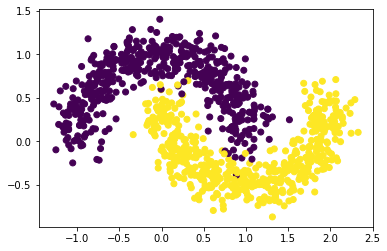

In [18]:
X, y = make_moons(n_samples=moons_samples, shuffle=True, noise=moons_jitter, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('two_moons_example.png')

In [19]:
import numpy as np
def getBlobDensities(n_centers):
  return np.round([3/n_centers * x for x in range(1, n_centers + 1)], decimals=2)

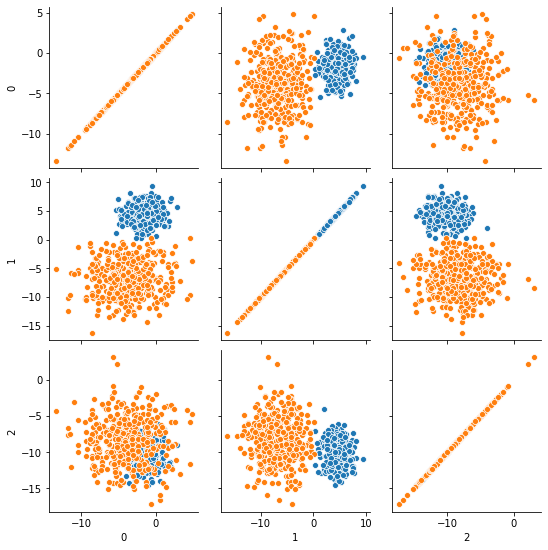

In [20]:
import seaborn as sns

X, y = make_blobs(n_samples=blobs_samples, centers=blobs_centers, n_features=blobs_features, cluster_std=getBlobDensities(blobs_centers), random_state=1)
blobs = pd.DataFrame(X)
blobs['cluster'] = y
g = sns.PairGrid(blobs, hue='cluster')
g.map(sns.scatterplot)

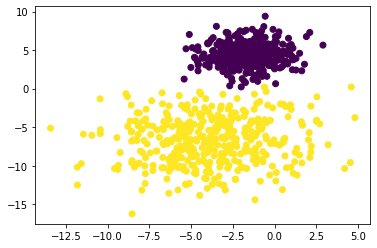

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('blobs_example.png')

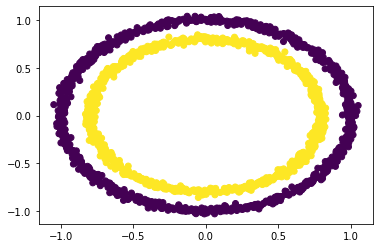

In [22]:
X, y = make_circles(n_samples=ring_samples, shuffle=True, noise=ring_jitter, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.savefig('rings_example.png')

Now we can look at the course of the optimizations themselves


In [23]:
df1 = two_moons_study.trials_dataframe(attrs=("number", "value", "params", "state"))
df2 = blobs_study.trials_dataframe(attrs=("number", "value", "params", "state"))
df3 = ring_study.trials_dataframe(attrs=("number", "value", "params", "state"))

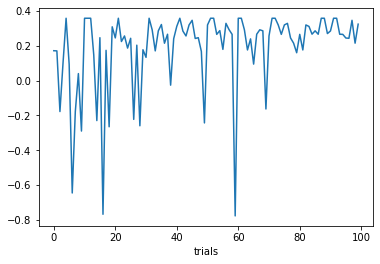

In [24]:
df1['value'].plot()
plt.xlabel('trials')

Text(0.5, 0, 'trials')

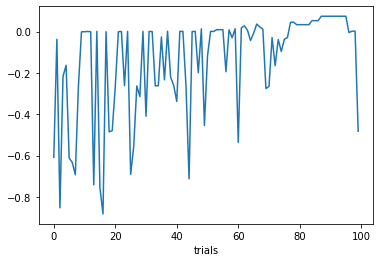

In [31]:
df2['value'].plot()
plt.xlabel('trials')

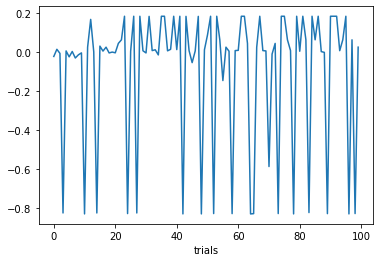

In [33]:
df3['value'].plot()
plt.xlabel('trials')
plt.savefig('rings_verlauf.png')